<a href="https://colab.research.google.com/github/YounSooKimTech/Joy_NLP_Power/blob/main/src/Results_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/YounSooKimTech/Joy_NLP_Power/main/data/Enron_merged_df.csv')
df.fillna('', inplace=True)


df.head(1)

,Receiver_Name,Receiver_Email,Receiver_Position,Receiver_Rank,Sender_Name,Sender_Email,Sender_Position,Sender_Rank,file,message,Subject,Body,Date,timezone,content,Date_UTC,Sender-Receiver,direction,tokens,cleaned_tokens
0,Andrew Lewis,andrew.lewis@enron.com,Vice President,4,Hunter Shively,hunter.shively@enron.com,Vice President,4,lewis-a/all_documents/6.,Message-ID: <20773283.1075848285687.JavaMail.e...,Western Frontier,---------------------- Forwarded by Hunter S S...,"Mon, 26 Mar 2001 02:44:00 -0800 (PST)",PST,,2001-03-26 10:44:00+00:00,0,same,[],[]


In [2]:
import pandas as pd
from textblob import TextBlob

# Define function to get sentiment score
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply function to each row of dataframe
df['sentiment'] = df['content'].apply(get_sentiment)


In [3]:
# descriptive stat
df.groupby("direction")["sentiment"].mean()

direction
downward    0.094941
same        0.056201
upward      0.098923
Name: sentiment, dtype: float64

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# fit an ANOVA model with the 'values' column as the dependent variable and the 'group' column as the independent variable
model = ols('sentiment ~ C(direction)', data=df).fit()

# perform an ANOVA test
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)
print("\n\n")

# perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df["sentiment"], df['direction'])

# print the Tukey's HSD results
print(tukey_results)
print("\n\n")


                 sum_sq      df          F    PR(>F)
C(direction)   0.788335     2.0  10.988535  0.000018
Residual      72.387309  2018.0        NaN       NaN



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
downward   same  -0.0387 0.0004 -0.0626 -0.0149   True
downward upward    0.004 0.9257  -0.021  0.0289  False
    same upward   0.0427 0.0001  0.0187  0.0667   True
------------------------------------------------------





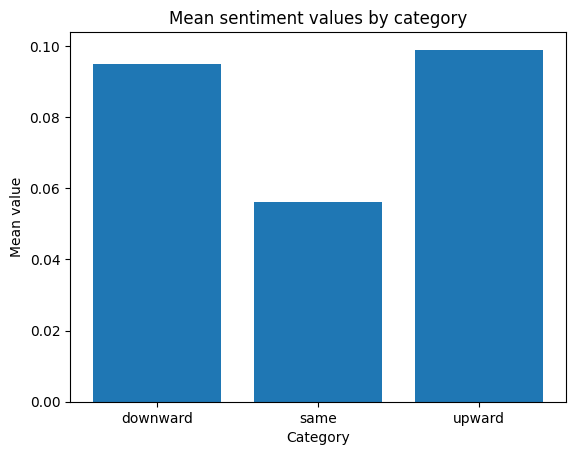

In [5]:

import matplotlib.pyplot as plt
means =df.groupby('direction')['sentiment'].mean()
plt.bar(means.index, means.values)
plt.title('Mean sentiment values by category')
plt.xlabel('Category')
plt.ylabel('Mean value')
plt.show()
